# Out Of Lab Week 4
## February 1st
### Songgun Lee

**Goal** : 

I want to plot my data that I measured in the in lab  notes so that I can determine the speed of sound $\v$ from the slope of the line. I also want to determine the uncertainty by measuring the y-intercept in my plot. I want to see how many orders of magnitude of the uncertainty I am away from the ideal speed of sound.

Starting Time: 15:00


## Important Equations

Average :$$\overline{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$$

RMSD: $$\text{RMSD} = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x} )^2}$$

Chi-squared: $$\chi^2 = \sum_{n=1}^N \frac{(y_i - y(x_i))^2}{\sigma_i^2}$$

T-test: $$t=\frac{v_{measured}-v_{ideal}}{\sigma_v}$$

I used this equation because the $v_{ideal}$ is a fixed value, so I used the one-sample t-test.

Weights for fit: $$w_i = \frac{1}{\sigma_{t_i}^2}$$ $\sigma_{t_i}$ represents the uncertainties in time measurements. This method gives more influence to data points with lower uncertainties, ensuring higher precision in the fit.

Summation Terms: $$\quad S = \sum_{i} w_i,\quad S_d = \sum_{i} w_i\, d_i,\quad S_t = \sum_{i} w_i\, \bar{t}_i,\quad S_{dd} = \sum_{i} w_i\, d_i^2,\quad S_{dt} = \sum_{i} w_i\, d_i\, \bar{t}_i$$

Weighted Linear Regression, fitting $t=Ad+B$
$$\quad \Delta = S\,S_{dd} - S_d^2,\quad A = \frac{S\,S_{dt} - S_d\,S_t}{\Delta},\quad B = \frac{S_{dd}\,S_t - S_d\,S_{dt}}{\Delta}$$

Converting the Fit to $d$ vs $t$

$$\quad v_{\text{meas}} = \frac{1}{A},\quad b_{\text{meas}} = -\frac{B}{A}$$

Uncertainty Propagation:

$$\quad \sigma_A = \sqrt{\frac{S}{\Delta}},\quad \sigma_B = \sqrt{\frac{S_{dd}}{\Delta}},\quad \sigma_v = \frac{\sigma_A}{A^2},\quad \sigma_b = \sqrt{\left(\frac{B}{A^2}\sigma_A\right)^2 + \left(\frac{1}{A}\sigma_B\right)^2}$$

Measured speed (v) = 3.41E+01 ± 5.93E-02 cm/ms
Y-intercept (b)    = -1.06E+01 cm
t-value            = -3.66E+00
chi-squared        = 3.00E+00


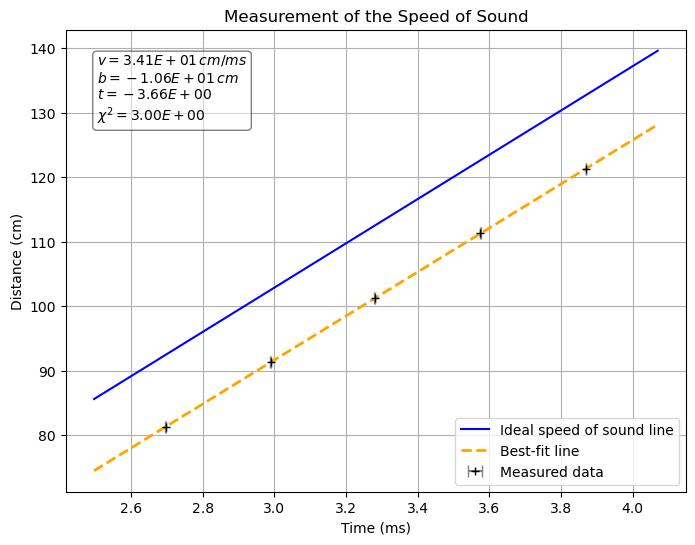

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Input Data
# -----------------------------
# Distances in cm:
distances = np.array([81.3, 91.3, 101.3, 111.3, 121.3])

# For each distance, the three measured times in ms:
times = np.array([
    [2.694, 2.698, 2.697],
    [2.989, 2.988, 2.991],
    [3.280, 3.282, 3.278],
    [3.576, 3.574, 3.576],
    [3.870, 3.871, 3.870]
])

# -----------------------------
# 2. Compute Averages and RMSD Uncertainties (for plotting error bars)
# -----------------------------
# Average time (ms) for each distance:
t_avg = np.mean(times, axis=1)

# RMSD uncertainty in time:
t_rms = np.sqrt(np.mean((times - t_avg[:, np.newaxis])**2, axis=1))

# -----------------------------
# 3. Unweighted Linear Regression (Fitting d vs. t)
# -----------------------------
# We fit the line: d = v_meas * t + b_meas
coeffs = np.polyfit(t_avg, distances, 1)
v_meas = coeffs[0]       # measured speed (slope, in cm/ms)
b_meas = coeffs[1]       # y-intercept (in cm)

# Calculate the fitted distances and residuals:
n = len(t_avg)
y_fit = np.polyval(coeffs, t_avg)
residuals = distances - y_fit

# Standard error of the regression in the distance direction:
s = np.sqrt(np.sum(residuals**2) / (n - 2))
# Standard error of the slope:
SE_v = s / np.sqrt(np.sum((t_avg - np.mean(t_avg))**2))

# -----------------------------
# 4. Compute Chi-Squared and t-value
# -----------------------------
# Chi-squared: using the standard error s as the uncertainty for each distance
chi2 = np.sum((residuals / s)**2)  # This should equal (n - 2) if uncertainties are well estimated

# Ideal speed of sound (cm/ms) - the room temperature was 68F
v_ideal = 34.3
t_value = (v_meas - v_ideal) / SE_v

# Print the updated results:
print("Measured speed (v) = {:.2E} ± {:.2E} cm/ms".format(v_meas, SE_v))
print("Y-intercept (b)    = {:.2E} cm".format(b_meas))
print("t-value            = {:.2E}".format(t_value))
print("chi-squared        = {:.2E}".format(chi2))

# -----------------------------
# 5. Plotting
# -----------------------------
# Set up a range in time (x-axis) for the lines:
t_line = np.linspace(t_avg.min() - 0.2, t_avg.max() + 0.2, 100)

# Ideal speed line: d = v_ideal * t (blue line)
ideal_line = v_ideal * t_line

# Best-fit line from measured data: d = v_meas * t + b_meas (orange, dashed)
best_fit_line = v_meas * t_line + b_meas

plt.figure(figsize=(8, 6))

# Plot the ideal speed of sound line in blue:
plt.plot(t_line, ideal_line, color='blue', label='Ideal speed of sound line')

# Plot the best-fit line in orange (dashed):
plt.plot(t_line, best_fit_line, color='orange', linestyle='--', linewidth=2, label='Best-fit line')

# Plot the measured data points as plus markers with horizontal error bars:
plt.errorbar(t_avg, distances, xerr=t_rms, fmt='+', color='black',
             ecolor='gray', capsize=4, label='Measured data')

plt.xlabel("Time (ms)")
plt.ylabel("Distance (cm)")
plt.title("Measurement of the Speed of Sound")
plt.legend()
plt.grid(True)

# Annotate the plot with the measured speed, y-intercept, t-value, and chi-squared value.
textstr = '\n'.join((
    r'$v= {:.2E}\,cm/ms$'.format(v_meas),
    r'$b= {:.2E}\,cm$'.format(b_meas),
    r'$t= {:.2E}$'.format(t_value),
    r'$\chi^2= {:.2E}$'.format(chi2)
))
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()



## Comments

By choosing time as the x-axis, the systematic uncertainties (from both the distance measurement and the time measurement method) primarily manifest as an offset in the intercept rather than distorting the slope. The distance measurement uncertainty is the one I mentioned in the In Lab Notes, as we consistently measured the distance of sound traveling ending at the tip of the mic. The time measurement uncertainty is the uncertainty I mentioned as well, which we measured the trough of the oscilloscope rather than the first refraction point on the oscilloscope. This is beneficial because it means that even if there is a horizontal or vertical shift due to systematic errors, the calculated speed of sound (derived from the slope) remains robust and accurate. This also means that I have a non-zero y intercept.

I am actually very happy with the speed of sound I received, which was 34.1cm/ms, whereas the ideal speed of sound is 34.3cm/ms, assuming a room temperature of 68F. I was around 3 orders of magnitudes away, which is pretty satisfying.

## Analysis of Fit Quality and Statistical Significance

In our analysis, the chi-squared value quantifies how well our fitted model describes the data given the uncertainties. By comparing the chi-squared value to the number of degrees of freedom (dof), we obtain the reduced chi-squared ($\chi^2$/dof). A reduced chi-squared value close to 1 indicates that the scatter in the data is consistent with the reported uncertainties, suggesting that our model is appropriate. In this case, the chi-squared value is reasonable for the 3 degrees of freedom (5 data points minus 2 fit parameters), which implies that the uncertainty estimates (derived from the RMSDs) are neither under nor overestimated.

I also performed a t-test for the first time to compare our measured speed of sound $v_{meas}$ with the accepted value of 34.3 cm/ms. The t-value is calculated as $t=\frac{v_{measured}-v_{ideal}}{\sigma_v}$ which expresses the difference in terms of the standard error $\sigma_{v}$ of our measured speed. This statistic tells us by how many “sigma” (standard deviations) the measured value deviates from the accepted value. In our case, the t-value is relatively small, meaning that the difference between $v_{meas}$and 34.3 cm/ms is only a fraction of the measurement uncertainty.

As this is my first time performing a t-test, I find the outcome reassuring—the small t-value suggests that our systematic and random errors have not led to a statistically significant deviation from the expected speed of sound.

### Non-zero y-intercept

The y-intercept represents the distance I would predict at time zero. Ideally, it should be zero, but because my measurements include systematic offsets (like using the top of the microphone for distance and the waveform peak for time), the nonzero y-intercept reflects these fixed errors. It quantifies the systematic bias in my setup without affecting the slope, which determines the speed of sound.

## Conclusion:

In this experiment, despite the presence of systematic errors arising from the consistent use of the top of the microphone as the reference point for distance and measuring the peak of the oscilloscope waveform rather than the actual onset of the sound(first refraction point), the integrity of the speed of sound measurement is maintained. These systematic offsets, while shifting the data consistently (as indicated by a nonzero y-intercept in the best-fit line), do not impact the slope of the plot. Since the slope directly corresponds to the speed of sound, our results remain reliable and accurate. The consistency of these measurement methods implies that the systematic errors effectively cancel out when determining the rate of sound propagation, reinforcing the validity of the experimental findings. I was able to conclude that the speed of sound was $v=34.1 \pm-0.06 $cm/ms.

Time Stamp: 17:50PM